# 4:  Counting Statistics: Binomial and Poisson: 

These problems are provided as Jupyter notebooks, so that you can edit your own version and include some simple calculations. You don't have to - you can do your own calculations any way you like - but it will get you used to doing statistics calculations with Python, which will gradually be more powerful in later weeks.


**Python setup**

To make our calculations easier this week, we will use standard Python modules, 
scipy.special.comb is the python routine for nCr

In [2]:
from math import *  # basic maths routines
import numpy as np  # more advanced maths routines
from scipy import stats, special # stats routines, e.g. binomial and Poisson distributions also comb is the factorial
import matplotlib.pyplot as plt

# Level 1 Problems: simple calculations
These are what you might call "plug-in" problems. If you identify the concept or key formula that applies, it should be a fairly simple calculation to get the right answer.

### P4.1 Four tosses (L1)
We toss a coin 4 times. What is the probability of getting four heads? What is the probability of getting at least 3 heads?

## Solution ##  
For the first part we want the binomial distribution with $n=4$ and $r=4$ and $p=0.5$. We can do this with the appropriate Python function. For the second part we want the $r=3$ value as well.

In [3]:
n=4;p=0.5
r=4; P4=stats.binom.pmf(r,n,p)
r=3; P3=stats.binom.pmf(r,n,p)
PGE3 = P3 +P4

print("Prob of exactly 4 heads= ", P4)
print("Prob of exactly 3 heads=", round(P3,3))
print("Prob of at least 3 heads= ", round(PGE3,5))

Prob of exactly 4 heads=  0.0625
Prob of exactly 3 heads= 0.25
Prob of at least 3 heads=  0.3125


# Check # 
Check you understand the formula by doing the calculation using the binomial formula

$$f_{np}(x) = {n \choose x} p^x(1-p)^{n-x} \quad{\rm with}\quad {n \choose x} = \frac{n!}{x!(n-x)!}$$

with the appropriate values of $n,r,p$

In [4]:
P4 = p**4*factorial(4)/factorial(4)/factorial(0)  % (1/16)*24/24
P3 = p**3*(1-p)*factorial(4)/factorial(3)/factorial(1)  % (1/16)*24/6
PGE3 = P3 +P4

print("Prob of exactly 4 heads= ", P4)
print("Prob of exactly 3 heads=", round(P3,3))
print("Prob of at least 3 heads= ", round(PGE3,5))

Prob of exactly 4 heads=  0.0
Prob of exactly 3 heads= 0.0
Prob of at least 3 heads=  0.0


### P4.2 Forty tosses (L1)
We toss a coin 40 times. What is the probability of getting at least 30 heads?

**Solution**  
This is where the Python functions are very handy. It would be painful calculating $P30+P31+P32...$ etc by hand. But Python will do this for us with the cumulative function:

In [5]:
# note the Python "survival function" is for above r, not r and above
n=40; p=0.5; r=29
PGE30 = stats.binom.sf(r,n,p)
P30 =0 
for i in range(11):  # tails can be 0-10
    P30 = p**40*factorial(40)/factorial(40-i)/factorial(i) + P30
print("Probability of at least 30 heads= ",round(PGE30,7),round(P30,7))

Probability of at least 30 heads=  0.0011107 0.0011107


### P4.3 Unfair coin (L1)
We toss a coin 4 times. Assuming the coin is fair, the most likely number of heads is 2. What is the ratio of the probability of getting 1 head to the probability of getting 3 heads? If in fact the coin is not fair, and the probability of getting heads is 0.3, how does that ratio change?

**Solution**  
For a fair coin with $p=0.5$ the binomial distribution will be symmetric about the peak, so the ratio must be $P(1)/P(3) =1.0$. If however $p=0.3$, we can calculate revised probabilities:

In [6]:
p=0.3; n=4
r=1; P1=stats.binom.pmf(r,n,p)
r=3; P3=stats.binom.pmf(r,n,p)
ratio=P1/P3
print("For unfair coin with p(heads)=0.3 and four tosses:")
print("Ratio P(1)/P(3)= ",round(ratio,2))

For unfair coin with p(heads)=0.3 and four tosses:
Ratio P(1)/P(3)=  5.44


### P4.4 Radioactive detection (L1)

We are monitoring the radioacivity from a lump of radioactive material with a Geiger counter and find that one average we get 0.34 clicks per second. What is the probability we will get at least one click in a 10 second window?

**Solution**  
The Poisson distribution will apply here

$$ P(x) = \frac{\mu^x}{x!} e^{-\mu} $$ 

using the mean number of clicks per 10 second window, $\mu=10 \times 0.34 = 3.4$.  We want the probability of at least $x=1$, but note that we do not need to calculate $P(1) + P(2) + P(3)...$. Rather we just get $P(\geq 1) = 1 - P(0)$, and so we just need

$$ P(0) = e^{-\mu}$$

In [7]:
mu=3.4
P0=exp(-mu)
PGE1=1.-P0
print("Probability of at least one click= ",round(PGE1,3))

Probability of at least one click=  0.967


# Level 2 Problems: formulating problems
These are more like real-world problems. The key skill is being able to translate a physical description into appropriate mathematics, and then identifying the concepts and formulae you need to apply. Sometimes at that point its a straightforward calculation, but more often you need a bit more mathematical manipulation, keeping the physical meaning in mind, and then finally calculating.   

### P4.5 Cancer Recovery (L2)
Ten patients have a form of cancer from which the recovery rate is 80\%. What is the probability that exactly 7 of them will recover? What is the probability that exactly 3 of them will recover? What is the probability that 7 or fewer will recover?

**Solution**  
Seeing whether each patient recovers can be seen as a "trial". So the probability follows the binomial distribution, with probability per trial $p=0.8$, and the number of trials $n=10$. So for the first two parts, we can ask "what is the probability of 7 recoveries out of 10", or likewise for 3 recoveries, which we can get directly with the appropriate Python stats function. For the probability of 7 or fewer, we can use the Python cumulative function.

In [8]:
ptrial=0.8
n=10
x=3; P3=stats.binom.pmf(x,n,ptrial)
x=7; P7=stats.binom.pmf(x,n,ptrial)
print("Prob of exactly 7 recoveries= ", round(P7,4))
print("Prob of exactly 3 recoveries= ", round(P3,4))

PLE7=stats.binom.cdf(x,n,ptrial)
print("Prob of 7 or fewer recoveries= ",round(PLE7,3))

Prob of exactly 7 recoveries=  0.2013
Prob of exactly 3 recoveries=  0.0008
Prob of 7 or fewer recoveries=  0.322


We can do a **manual check**, remembering that
$$f_{np}(x) = {n \choose x} p^x(1-p)^{n-x} \quad{\rm with}\quad {n \choose x} = \frac{n!}{x!(n-x)!}$$
Lets do this for P7.

In [9]:
x=7; n=10; ptrial=0.8
ncx=comb(n,x)
P7check=ptrial**x*(1-ptrial)**(n-x)*ncx
print(P7check)

0.20132659199999994


If checking $P(\leq 7)$ manually, note that you do **not** need to do  

$P(0) + P(1) + P(2) + P(3) + P(4) + P(5) +P(6) + P(7)$  

its quicker to do  

$1- P(8) + P(9) + P(10)$

### P4.6 Variation in dice rolls (L2)
Consider rolling a dice $n$ times and noting how many sixes are rolled. How large does $n$ have to be for the difference between the average number of sixes thrown and the theoretical probability of a six to be expected to be less than 0.01? 
Adapt the 2_pop_vs_simulation.ipnyb notebook to simulate it

**Solution**  
The error on the mean is, $\sigma/\sqrt{n}$. For the binomial distribution $\mu=p=1/6$ and $\sigma^2=p(1-p)=5n/36$ for $n$ throws 
which gives us:

Number of sixes thrown = $\mu n \pm \sigma$ = $p n \pm \sqrt{p(1-p)n}$  

Divide by n to get the mean number of sixes thrown = $p \pm \sqrt{p(1-p)/n}$

So we want 

$$0.01= \sqrt{\frac{p(1-p)}{n}} $$

$$n=\left (\frac{(1-p)p}{0.01^2} \right )=193$$

Now we try to simulate it.

Number of rolls required in theory=  1388
Final average 0.185 error= 0.01833333333333334


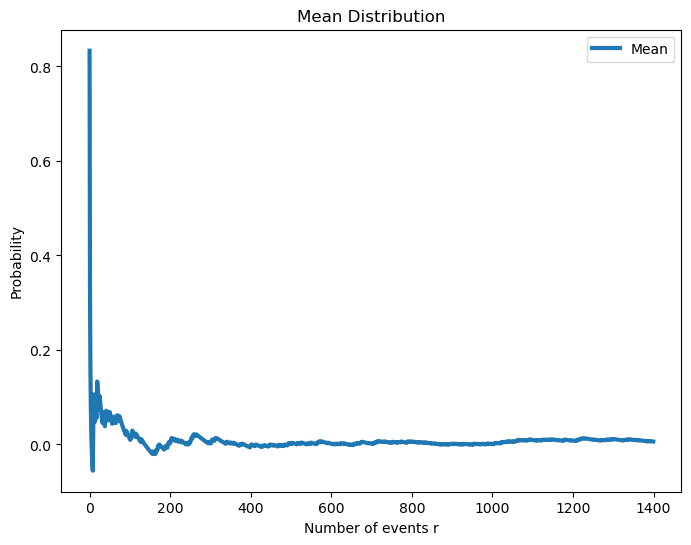

In [21]:
import random
p=1./6
alpha=0.01
nrolls=int( (1.-p)*p/(alpha*alpha)) 
print("Number of rolls required in theory= ",nrolls)

#Lets do a simulation, from 2_pop_vs_simulation.ipnyb
# Run this several times
num_trials=1400 #  Number of dice thrown
sample_mean = []
total=0
for n in range(1,num_trials+1):
    result = random.randint(1,6)
    if(result==6): total=total+1
#    cov=(total/n)/sqrt(5.0*n/36.0)    
    sample_mean.append(total/n-1.0/6.0)
if(nrolls>>num_trials): print("After", nrolls,  "error=",sample_mean[nrolls])
print("Final average",total/n, "error=",total/n-1.0/6.0)
#plot the distribution

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the distribution
x_values = np.arange(len(means))
ax.plot(x_values, means, label='Mean', linewidth=3)

# Set labels and title
ax.set_xlabel('Number of events r')
ax.set_ylabel('Probability')
ax.set_title('Mean Distribution')

# Show the Matplotlib plot
plt.legend()
plt.show()

### P4.7 Driving Test success (L2)
It has been suggested that the probability of passing a driving test on any one attempt is 0.75. What then is the probability that an applicant will pass only on the fourth attempt? Comment on  the assumption you make.

**Solution**  
If we assume that there is no correlation, this is an example of the geometric distribution, which is the binomial waiting time distribution for the case of success on the $x$th trial. From the notes the probability is 

$g(x)=p(1-p)^{x-1}$   

where $p$ is the probability of success for each trial and $x$ is the number of the trial on which we get success.  

In [10]:
ptrial=0.75
x=4
Px=ptrial*(1.-ptrial)**(x-1)
print("Probability of passing on fourth attempt= ",round(Px,4))

Probability of passing on fourth attempt=  0.0117


The geometric formula is actually fairly obvious from first principles. To get a hit on the fourth go, we need to fail 1, and fail 2, and fail 3, and get a hit on 4, and multiply each of those probabilities together.

The assumption is that the probability of passing on each attempt is independent of the ability of the driver. This is unlikely to be true, because if it was, the test would be unrelated to driving ability. A terrible driver will be terrible at each attempt, although a learner will have a better chance of passing the second time and so on (assuming that they learn from experience!)

### P4.8 Lorry Inspector (L2)
A government inspector checks whether the lorries run by haulage companies have exhaust emissions compliant with the law. They turn up at a company and pick 6 lorries at random to inspect. One particular company has 24 lorries, and the truth is that 4 of them are defective. What is the probability that the inspector will find none of the defective lorries?

**Solution**  
This is an example of binomial sampling but without replacement, so the probability is given by the hypergeometric distribution. We can step through this process in code using a for loop.

In [49]:
npick=6
nlorries=24 
ndefective=4
notfound=1.0  #  Probability that we haven't found a dodgy lorry so far
for ipick in range(npick):
    notfound=notfound*(nlorries-ndefective)/nlorries # cumulative probabilty of finding another non-defective lorry
    nlorries = nlorries-1 # "without replacement": we dont test that lorry again
    print("Probability of not finding one of ",ndefective," lorries in",ipick+1," picks is ",notfound)

Probability of not finding one of  4  lorries in 1  picks is  0.8333333333333334
Probability of not finding one of  4  lorries in 2  picks is  0.6884057971014493
Probability of not finding one of  4  lorries in 3  picks is  0.5632411067193677
Probability of not finding one of  4  lorries in 4  picks is  0.45595708639186905
Probability of not finding one of  4  lorries in 5  picks is  0.36476566911349523
Probability of not finding one of  4  lorries in 6  picks is  0.28797289666854886


**Analytic check**  In the notes, we stated that the probability of $r$ successes out of $n$ picks is

$$ P(r) = \frac{{W \choose r} {N-W \choose n-r}}
{{N \choose n}}
$$

where  
$n$ is the number of picks; $n=6$ in this case  
$r$ is the number of successes (finding a defective lorry in this case)  
$N$ is the total pool of things to pick from ($N=24$ lorries in this case)  
$W$ is the starting pool of possible successful things ($W=4$ defective lorries in this case)  

We want to calculate the probability of finding $r=0$,  so we can put those numbers into our formula  
$$ P(0) = \frac{{4 \choose 0} {20 \choose 6}}
{{24 \choose 6}}
$$ If doing the calculation manually...

$$P(0) = \frac{{4 \choose 0} {20 \choose 6}}
{{24 \choose 6}}
= 1 \times \frac{20!}{14!6!} \times \frac{18!6!}{24!}
= \frac{18.17.16.15}{24.23.22.21}
= 0.288
$$


### P4.9 Fabric Inspector (L2)
A shop sells fabric on a roll that is 1m wide. They find that typically there is a defect in the fabric once every 5m length. They don't like to sell a length of fabric if it has four or more defects. A customer wants a 30m length. What is the probability that this will have four or more defects?

**Solution**  
The number of defects for a given length should follow a Poisson distribution. At any spot, the chance of there being a defect is very small, but are many possible such spots where a defect might occur on a given strip of cloth. Translating to the Poisson formula:

$$p(r) = \frac{\mu^r}{r!} e^{-\mu}$$

What is $\mu$? We are told the mean rate of defects is 0.2/metre but the customer wants a 30m length. On many such possible 30m lengths, the expected number of defects is $\mu=6.0$. So the probability of $r=4$ defects is given by the formula. However we want the probability of four or more. So we can use the cumulative version of the Python routine - but note this gives the prob of up to and including $r$, so what actually want is $P=1-P(r\leq 3)$

In [ ]:
mu=6.0
r=4
PGE4=1. - stats.poisson.cdf((r-1),mu)
print("Probability of four or more defects= ",round(PGE4,3))

It looks like rejecting lengths with four or more defects is a bit strict.. they will be rejecting most of them!

**Manual Version**  Once again, if doing the manual version, save yourself some time. Rather than  
$P(4)+P(5)+P(6)+...$  
all the way to infinity (or at least until converging....) you want  
$1. - P(0) + P(1) + P(2) + P(3)$  

# Level 3 Problems: needs some thought

These problems are not so straightforward, and are included mainly for curiousity or mathematical completeness, They 

### P4.10 Checking the Poisson mean result

In the notes we derived the Poisson distribution as the limit of the Binomial distribution, and then stated that the mean was $\mu$ because $\mu=np$ for the Binomial. Working from the formula for the Poisson distribution itself, can you show that the mean is equal to the $\mu$ in the formula?

**Solution**  
The population mean is the expectation value of $x$, $E(x)=\sum x f(x)$ so for Poisson we have

\begin{align*}
E(x) &= \sum_{x=1}^\infty x\cdot \frac{\mu^x}{x!} e^{-\mu} \\
&=\sum_{x=1}^\infty \frac{\mu^x}{(x-1)!} e^{-\mu} \\
&=\mu e^{-\mu} \sum_{x=1}^\infty \frac{\mu^{x-1}}{(x-1)!} \\
&=\mu e^{-\mu} \sum_{y=0}^\infty \frac{\mu^y}{y!}
\end{align*}

where in the last step we have changed from $x$ to $y=x-1$. Now we notice that the sum is the expansion of an exponent:

$$e^\mu = 1 + \mu + \frac{\mu^2}{2!} + \frac{\mu^3}{3!} +...$$

which is the same as our series in $y$. So we have

$$E(x) = \mu e^{-\mu} e^\mu = \mu$$


### P4.11 Hiding the bird 

You are trying to spot a small bird through a distant clump of trees. In this clump, there are on average 0.013 trees per square metre, but the trees can be regarded as being distributed randomly. Each tree is 0.7m wide, and the clump is 37m deep. At any one moment in time, what is the probability that the bird is hidden from your view? (**Hint** What is the mean number of trees in the line of sight? Assume this is Poisson distributed to solve the question - but you should also think about whether you think it **is** justified).

**Solution**  
As described in the hint, the key to this question is working out the mean number $\mu$ of trees in the line of sight, $\mu$, and taking this to be Poisson distributed. Then for the bird to be *not* hidden, in its direction there has to be zero trees in the line of sight, which has probability $P(0)=e^{-\mu}$. The fraction of sight lines where the bird is hidden is therefore $1-P(0)$.

The second key insight is understanding that the trees can overlap in the line of sight and that this is what gives us the mean number of trees in the line of sight. Consider  the clump to have width $W$ and be $D$ metres deep, so the area ia $A=DW$. If the surface density of trees is $\Sigma$, then the number of trees in our section is $N=A\Sigma=DW\Sigma$.

Each tree has width $d$. The summed width of trees is therefore $T=Nd=DW\Sigma d$. If we compare this to the actual width $W$, then the mean number of trees in the line of sight is 

$\mu=T/W=DW\Sigma d/W = D\Sigma d$.  

W cancels out, and the  **covered fraction** is  

$ C=1-e^{-\mu} = 0.29$   and we are given  

$D=37$m, $\Sigma=0.013$ m$^{-2}$, and $d=0.7$m  so: 





In [ ]:
D=37.
Sig=0.013
d=0.7
mu=D*Sig*d
print("mean no. trees in light of sight = ", round(mu,4))

C=1. - exp(-mu)
print("Covered fraction = prob. of bird being hidden = ", round(C,3))

So there is a 29\% chance of the bird being hidden.

One might ask whether the assumption of the Poisson distribution is justified. The answer is reasonably so. If you consider any individual tree in the whole clump, the probability of it being in our sight line is small. However there is a large number of trees that could potentially be in our sight line. The mean number in the line of sight is a middling number.

### P4.12 Fishy statistics

A pea-grower claims that due to genetic variation, the probability of a plant producing smooth peas is 0.75.   

In 28 samples of 20 plants, he observes one sample has 13 smooth peas, 8 samples have 14 smooth peas,  9 samples have 15 smooth peas,  and 10 samples have 16.  Why should you be sceptical of the claim?

A student repeats the experiment, obtaining  one sample with 11,  8 samples with 13 smooth peas,  9 with 15,  and 10 samples have 17.    Is this more reasonable? 



**solution**
If the theory is correct, the mean number of observations should be $<r>=20\times0.75= 15$, and it is.   
However, the standard deviation of the batches should be $\sqrt{20(0.25)(0.75)}\sim  1.93$, but in the professorial 
sample $\sigma=\sqrt{(1*4+8*1+10*1)/28} = 0.89$  is less than one.  Is this likely?

We have to consider the distribution of these errors, which we assume are drawn from a gaussian of mean 15 and $\sigma=0.89$.  Essentially, we ask what is the probability that in 28 trials, all of them will fall within 0.89 s.d. of the mean.  From the error function (1-2erf(0.89)) we find the probabilty that a single batch is within 0.89 to be a reasonable 0.58.  But for 28 samples to all be that close, the probabilty is ($0.58^28$), less than one in a million  

It seems likely that the data are falsified.

With the student's data both the mean and the standard deviation are plausible, however inspecting the data we see it is 
identical to  the professor's data, with deviations from the mean scaled $r-<r>$ by a factor of 2.   This is probably fraudulent.

 Gregor Mendel's famous genetics experiment has implausibly low standard deviations, there is a longstanding debate about whether his data was falsified.